In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Used Cars.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
df = df.drop(['Model'], axis=1)

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
df_no_mv = df.dropna(axis=0)
df_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

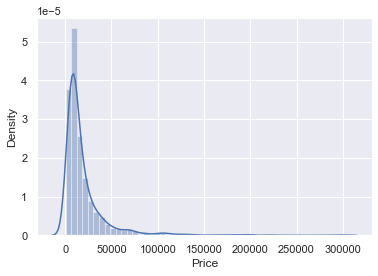

In [7]:
# Probability Distribution Function (PDF)
# Before removing Outliers
sns.distplot(df_no_mv['Price'])

In [8]:
q = df_no_mv['Price'].quantile(0.99)
df1 = df_no_mv[df_no_mv['Price'] < q]
df1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

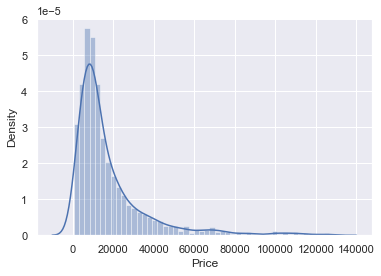

In [9]:
# After removing Outliers
sns.distplot(df1['Price'])

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

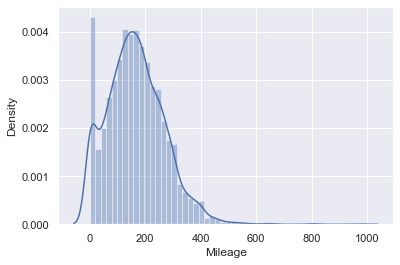

In [10]:
# Before removing Outliers
sns.distplot(df1['Mileage'])

In [11]:
q = df1['Mileage'].quantile(0.99)
df2 = df1[df1['Mileage']<q]

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

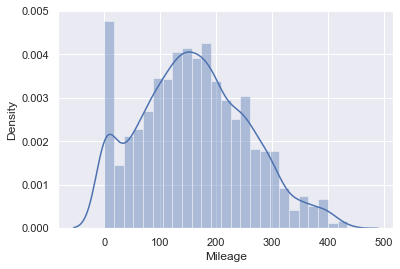

In [12]:
# After removing Outliers
sns.distplot(df2['Mileage'])

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

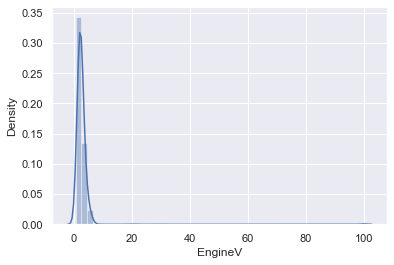

In [13]:
# Before removing Outliers
sns.distplot(df2['EngineV'])

In [14]:
df3 = df2[df2['EngineV']<6.5]

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

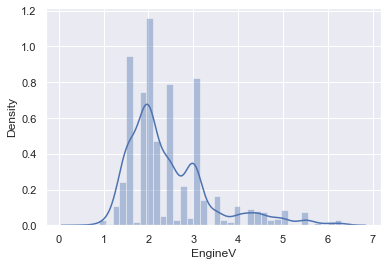

In [15]:
# After removing Outliers
sns.distplot(df3['EngineV'])

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

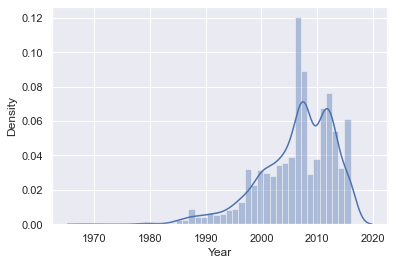

In [16]:
# Before removing Outliers
sns.distplot(df3['Year'])

In [17]:
q = df3['Year'].quantile(0.01)
df4 = df3[df3['Year']>q]

C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

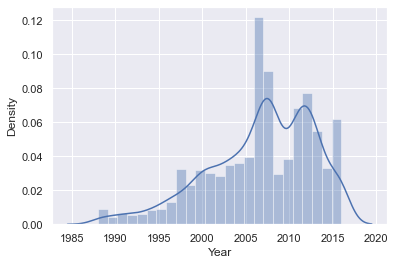

In [18]:
# After removing Outliers
sns.distplot(df4['Year'])

In [19]:
data_cleaned = df4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [20]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


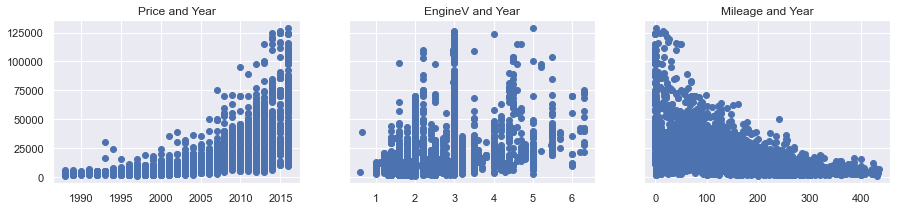

In [21]:
# Checking Linearity using Scatter Plot
# Can't run Linear Regression in this case. All 3 patterns are not Linear

f, (a1, a2, a3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
a1.scatter(data_cleaned['Year'], data_cleaned['Price'])
a1.set_title('Price and Year')
a2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
a2.set_title('EngineV and Year')
a3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
a3.set_title('Mileage and Year')
plt.show()

In [22]:
# To make price linear in all cases.
log_price = np.log(data_cleaned['Price'])
log_price['log_price'] = log_price

data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.34284
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.97462
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.49552
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.0432
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.81466
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.3501
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.79256
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.7361
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.77956


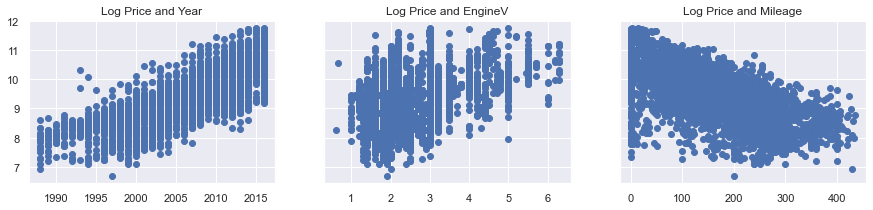

In [23]:
f, (a1, a2, a3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
a1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
a1.set_title('Log Price and Year')
a2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
a2.set_title('Log Price and EngineV')
a3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
a3.set_title('Log Price and Mileage')
plt.show()

In [24]:
data_cleaned = data_cleaned.drop(["Price"], axis = 1)

In [25]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.34284
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.97462
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.49552
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.0432
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.81466
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.3501
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.79256
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.7361
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.77956


In [26]:
# Check MultiCollinearity if few variables are dependent on each other.

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

C:\Users\Sanket\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [27]:
# Since Year has the highest VIF, I will remove it from the model

data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.34284
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.97462
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.49552
3,Audi,crossover,240,4.2,Petrol,yes,10.0432
4,Toyota,crossover,120,2.0,Petrol,yes,9.81466
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.3501
3863,Toyota,sedan,35,1.6,Petrol,yes,9.79256
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.7361
3865,BMW,sedan,1,3.5,Petrol,yes,8.77956


In [28]:
# Creating dummies, to include categorical data. Removing log_price and will add later after creating dummies.

data_without_log_price = data_no_multicollinearity.drop(['log_price'], axis=1)


In [29]:
data_dummies = pd.get_dummies(data_without_log_price, drop_first=True)
data_dummies['log_price'] = log_price
data_dummies.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,log_price
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,8.34284
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8.97462
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,9.49552
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10.0432
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,9.81466


In [30]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'log_price'],
      dtype=object)

In [31]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34284,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97462,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.49552,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.0432,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81466,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [32]:
# The x (dependent variable) is 'log price'
y = data_preprocessed['log_price']

# The x are everything BUT the dependent variable, so we can simply drop it
x = data_preprocessed.drop(['log_price'],axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [34]:
x1 = scaler.transform(x)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=365)

In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [37]:
predictions = lm.predict(x_train)

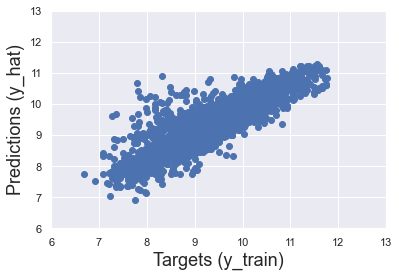

In [38]:
plt.scatter(y_train, predictions)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [39]:
# Find the R-squared of the model
lm.score(x_train,y_train)

0.744996578792662

In [40]:
print("The intercept is:", lm.intercept_)
print("The coefficient is:", lm.coef_)

The intercept is: 9.415239458021299
The coefficient is: [-0.44871341  0.20903483  0.0142496   0.01288174 -0.14055166 -0.17990912
 -0.06054988 -0.08992433 -0.1454692  -0.10144383 -0.20062984 -0.12988747
 -0.16859669 -0.12149035 -0.03336798 -0.14690868  0.32047333]


In [41]:
coeff_summary = pd.DataFrame(lm.coef_, x.columns.values, columns=['Weights'])
coeff_summary

,Weights
Mileage,-0.448713
EngineV,0.209035
Brand_BMW,0.014250
Brand_Mercedes-Benz,0.012882
Brand_Mitsubishi,-0.140552
Brand_Renault,-0.179909
Brand_Toyota,-0.060550
Brand_Volkswagen,-0.089924
Body_hatch,-0.145469
Body_other,-0.101444
